In [2]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
task_1=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-zakorko/5_task_1.csv')
task_2=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-zakorko/5_task_2.csv')

In [5]:
task_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [6]:
#через pingouin

pg.homoscedasticity(data=task_1, dv="events", group="group")

,W,pval,equal_var
levene,2.26226,0.104133,True


In [7]:
#через pingouin

pg.normality(data=task_1, dv="events", group="group", method="normaltest")

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


In [12]:
#через scipy

A = task_1.query("group == 'A'").events
B = task_1.query("group == 'B'").events
C = task_1.query("group == 'C'").events

In [13]:
ss.f_oneway(A, B, C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [15]:
pairwise_tukeyhsd(task_1.events, task_1.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


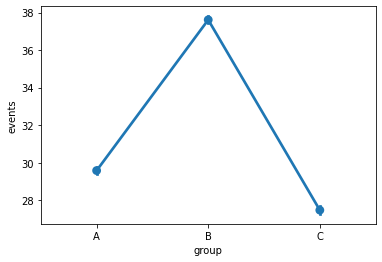

In [16]:
#средние с доверительными интервалами

sns.pointplot(x="group", y="events", data=task_1)

In [17]:
task_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [50]:
test_group = task_2.query("group == 'test'").events
control_group = task_2.query("group == 'control'").events


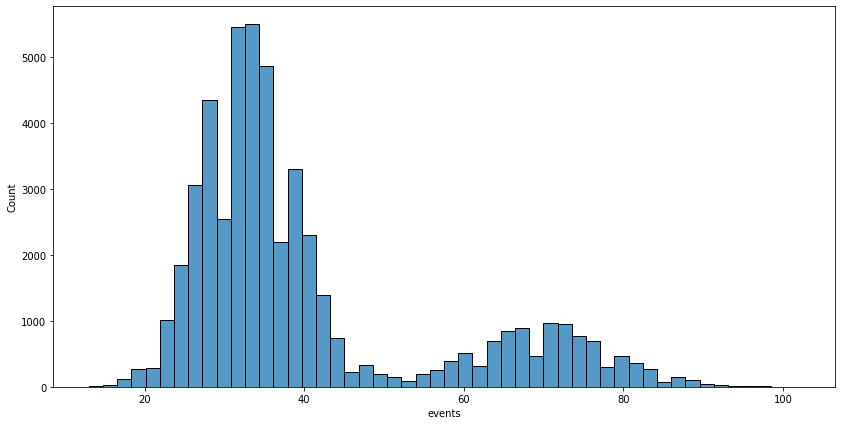

In [55]:
plt.figure(figsize=(14, 7))
sns.histplot(test_group, bins=50, kde=False)

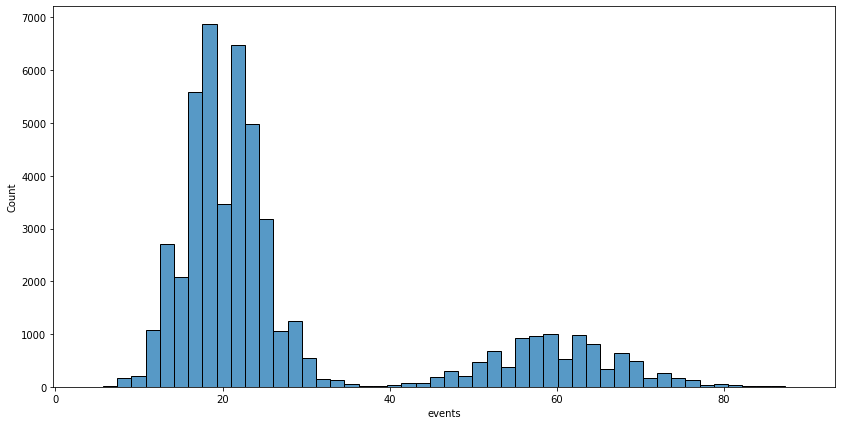

In [56]:
plt.figure(figsize=(14, 7))
sns.histplot(control_group, bins=50, kde=False)

In [63]:
discribe_test_group=task_2.query("group == 'control' and segment == 'high'").events.describe()
discribe_test_group

count    10000.000000
mean        59.970800
std          7.805347
min         31.000000
25%         55.000000
50%         60.000000
75%         65.000000
max         89.000000
Name: events, dtype: float64

In [66]:
#взаимодействие

model_interact = smf.ols("events ~ segment + group + segment:group", data=task_2).fit()
anova_lm(model_interact,typ=2)

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [69]:
task_2['combination'] = task_2['group'] + " / " + task_2['segment']

# Perform the Tukey HSD test
tukey_results = pairwise_tukeyhsd(endog=task_2['events'], groups=task_2['combination'], alpha=0.05)

# Show the results of the Tukey HSD test
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control / high,control / low,-39.9392,0.001,-40.1073,-39.7711,True
control / high,test / high,9.9677,0.001,9.7551,10.1803,True
control / high,test / low,-26.9449,0.001,-27.113,-26.7768,True
control / low,test / high,49.9069,0.001,49.7388,50.075,True
control / low,test / low,12.9944,0.001,12.888,13.1007,True
test / high,test / low,-36.9126,0.001,-37.0807,-36.7445,True
